In [22]:
from PIL import Image, ImageDraw, ImageFont
import io
import math
from datetime import datetime, timedelta
from time import sleep, time

In [100]:
def build_image_bytes(num_bytes, camera, frame_number, timestamp_ms):
    timestamp_str = (datetime(1970, 1, 1) + timedelta(milliseconds=timestamp_ms)).strftime("%H:%M:%S.%f")[:-3]
    width = math.ceil(math.sqrt(num_bytes / 3))
    height = width
    font_size = int(min(width, height) * 0.13)
    img = Image.new('RGB', (width, height), (25, 25, 240, 0))
#     font = ImageFont.truetype('/usr/share/fonts/truetype/freefont/FreeSans.ttf', font_size)
    font = ImageFont.truetype('FreeMonoBold.ttf', font_size)
    draw = ImageDraw.Draw(img)
    draw.text(
        (5, 5), 
        'CAMERA\n %04d\nFRAME\n%05d\n%s' % (camera, frame_number, timestamp_str), 
        font=font, 
        align='center')
    out_bytesio = io.BytesIO()
    img.save(out_bytesio, format='PNG', compress_level=0)
    out_bytes = out_bytesio.getvalue()
    return out_bytes

In [101]:
in_png_bytes = build_image_bytes(20*1024, 0, 0, int(time() * 1000))

In [102]:
in_pil = Image.open(io.BytesIO(in_png_bytes))

In [103]:
in_pil.mode, in_pil.size

('RGB', (83, 83))

In [104]:
out_raw_bytes = in_pil.tobytes()

In [105]:
out_pil = Image.frombytes(in_pil.mode, in_pil.size, out_raw_bytes)

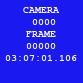

In [106]:
out_pil

In [109]:
ms = time() * 1000

In [110]:
(datetime(1970, 1, 1) + timedelta(milliseconds=ms)).strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3] + 'Z'

'2019-05-29T03:41:25.343Z'